In [1]:
from __future__ import print_function
import time
import numpy as np

import galsim
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm
#from galsim_test_helpers import *

In [2]:
pixel_scale = 0.1
lamda = 550 #nm
diameter = 1.2 #m
airy = galsim.Airy(lam=lamda, diam=diameter, scale_unit=galsim.arcsec, obscuration=0.3)
pixel = galsim.Pixel(pixel_scale)
psf = galsim.Convolve(airy, pixel,real_space=False)

psfii_size = 2048
image_psf=psf.drawImage(scale=pixel_scale,method='no_pixel')

oversampled_image_psf=galsim.ImageF(psfii_size,psfii_size)
oversampled_image_psf=psf.drawImage(image=oversampled_image_psf, scale=pixel_scale/10.,method='no_pixel')
psfii = galsim.InterpolatedImage(oversampled_image_psf)

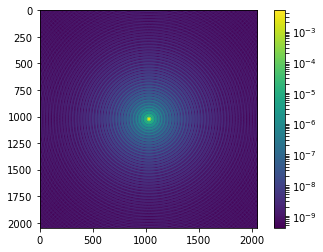

In [3]:
plt.imshow(oversampled_image_psf.array,norm=LogNorm())
plt.colorbar()

In [4]:
gal = galsim.Gaussian(half_light_radius = 2, flux=100)

In [5]:
obs = galsim.Convolve(gal, psfii)
obsIm = obs.drawImage(scale=pixel_scale, method='no_pixel')
obsIm = galsim.ImageF(obsIm.array.shape[0]*2, obsIm.array.shape[1]*2)
obsIm = obs.drawImage(image=obsIm, scale=pixel_scale, method='no_pixel')

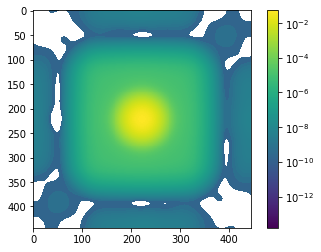

In [6]:
plt.imshow(obsIm.array,norm=LogNorm()); plt.colorbar()

In [7]:
galsim.InterpolatedImage?